In [1]:
import numpy as np
import pandas as pd

### 1. 데이터 수집

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
iris_data = iris.data
iris_target = iris.target

### df로 출력

In [4]:
df=pd.DataFrame(iris_data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 2개의 특성만 선택하여 데이터로 사용한다

In [5]:
X_train = df.iloc[:, :2]
X_train.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


### 3. 모델 생성

In [6]:
from sklearn.cluster import KMeans

In [7]:
km = KMeans(n_clusters=3, init="k-means++", max_iter=300, random_state=1, verbose=1)
km.fit(X_train)  # 비지도학습이기 때문에  훈련 데이터만 지정한다.  label은 지정안함.

Initialization complete
Iteration 0, inertia 42.33.
Iteration 1, inertia 38.45473523858168.
Iteration 2, inertia 37.93460776717187.
Iteration 3, inertia 37.43030635811262.
Iteration 4, inertia 37.19265738634543.
Iteration 5, inertia 37.06326071457923.
Iteration 6, inertia 37.05070212765958.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 40.53.
Iteration 1, inertia 38.041521459573424.
Iteration 2, inertia 37.999383790977376.
Iteration 3, inertia 37.87784960454772.
Iteration 4, inertia 37.802151701698875.
Iteration 5, inertia 37.71361374830404.
Iteration 6, inertia 37.653760886410744.
Iteration 7, inertia 37.439185033650915.
Iteration 8, inertia 37.32760861957952.
Iteration 9, inertia 37.25998479982724.
Iteration 10, inertia 37.14677171591315.
Iteration 11, inertia 37.100145824255634.
Iteration 12, inertia 37.08627024722932.
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 51.280000000000015.
Iteration

C:\Users\YB\anaconda3\envs\tf24\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=1, verbose=1)

In [8]:

### 각 클러스터링된 레이블 값 ( 우리가 지정한 것이 아니고 알고리즘이 임의로 지정한값이다.)
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [9]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2]), array([50, 47, 53], dtype=int64))

In [10]:
# 중심점(centroid) 값 확인
km.cluster_centers_

array([[5.006     , 3.428     ],
       [6.81276596, 3.07446809],
       [5.77358491, 2.69245283]])

### 시각화

In [12]:

import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
centers = pd.DataFrame(km.cluster_centers_, columns=['Sepal length','Sepal width'])
center_x = centers['Sepal length']
center_y = centers['Sepal width']

pred = km.predict(X_train)

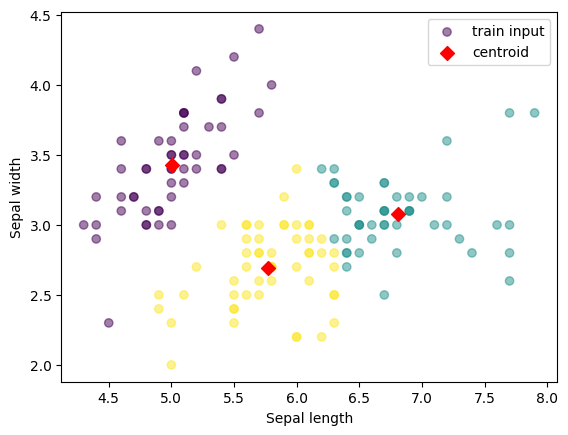

In [15]:
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=pred , alpha=0.5)
plt.scatter(center_x, center_y,s=50,marker='D',c='r')
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.legend(["train input","centroid"])
plt.show()

### 이너셔 시각화

C:\Users\YB\anaconda3\envs\tf24\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\YB\anaconda3\envs\tf24\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\YB\anaconda3\envs\tf24\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\YB\anaconda3\envs\tf24\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to 

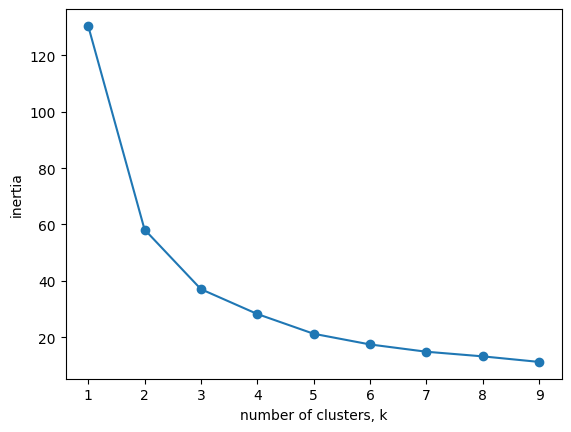

In [16]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X_train)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()